In [4]:
import multiprocessing# import Pool
#import multiprocV2
# import multiprocV3
# import multiprocV3SeparatePar
import multiprocV4SepPar_and_StepIsLive_Fano
import multiprocV4SepPar_and_StepIsLive_Copy1
#import multiproc
# import analysis_prob
#import analysisV3
# import like
from tqdm import tqdm
import waveAndLike
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate
from scipy.special import kn
import math
from scipy import special
from statistics import NormalDist
import os
from functools import reduce
from operator import mul
from math import comb
from scipy import stats

In [ ]:
def countjumps(output):
    
    flips=0
    laststate=output[0]
    for i in range(len(output)):
        if output[i]!=laststate:
            flips=flips+1
        laststate=output[i]
    return flips

def MakewaveformStateVector(seq, seqT, binwidth, timestep):
    numrepsInBin=int(binwidth/timestep)
    numBins=int(len(seq)/numrepsInBin)
    seq=seq[:int(numBins * numrepsInBin)].reshape(numBins, numrepsInBin)
    seqT=seqT[:int(numBins * numrepsInBin)].reshape(numBins, numrepsInBin)
    wvfm=np.zeros(numBins)
    btimes=np.zeros(numBins)
    for i in range(numBins):
        wvfm[i]=countjumps(seq[i])
        #wvfm[i]=jumpsWafm
        btimes[i]=np.median(seqT[i])
    return wvfm, numrepsInBin, btimes

In [ ]:
nondecTaus=[]
qpdecTaus=[]
parTaus=[]
noerrs=[]

In [52]:


edep= 0     #0.000004*1000#0.005#5000
mtime= 3.178
maxtime_ms=mtime#*1e-3   #numRatepts*timechunks #ns
ti=np.linspace(0,maxtime_ms,int(maxtime_ms/(50*1e-9)))

# prate, drate, rate_Dqp, rate_Dqp_base, full_rateDecqp, rate_P_no_State_change  =multiprocV4SepPar_and_StepIsLive.rates(edep,mtime)
plus=0
minus=0
reps=1#
nodd_nonqpdecs =np.zeros(reps)
neven_nonqpdecs=np.zeros(reps)
nonqpdecs=np.zeros(reps)
wvs=np.zeros(12)
ssf = 1# 0.95 #0.95 #1
T1baseus = 50
T2baseus = 50
xqpbase= 1*(1e-30)  #0.365*1e-7 
para=[ ssf,  edep, maxtime_ms]
binwidth=0.1*1e-3*1e9
ramseymeas_len=1060

for i in tqdm(range(reps)):
    
    prate, drate, rate_Dqp, rate_Dqp_base, full_rateDecqp, rate_P_no_State_change, xqps, gqp  =multiprocV4SepPar_and_StepIsLive_Fano.rates(edep,maxtime_ms, xqpbase, T1baseus, T2baseus)
    # para=[ssf,edep,mtime]
    parDecReadout, parDecReadoutTime, roseqwvfm1, errfrac  = multiprocV4SepPar_and_StepIsLive_Fano.sims(para)
    filt=waveAndLike.movmed(parDecReadout, 7)
    filtwv=waveAndLike.Makewaveform(filt, parDecReadoutTime, binwidth, ramseymeas_len)
    # print('len(parDecReadout)',len(parDecReadout))
    # print('errfrac',errfrac)
    # , mostprobenergydep25, decNonQPtimes, decQPtimes, tpars, noerr
    # #print('mostprobenergydep25 ',mostprobenergydep25 )
    # if len(decNonQPtimes)!=0: 
    #     nondecTaus.extend(decNonQPtimes)
    # if len(decQPtimes)!=0:
    #     qpdecTaus.extend(decQPtimes)
    # if len(tpars)!=0:
    #     parTaus.extend(tpars)
    # noerrs.append(noerr)
    #print('(decNonQPtimes)*1e-3',(np.array(decNonQPtimes))*1e-3)
    # plt.plot(np.array(decNonQPtimes)*1e-3, '*')
    # plt.plot(np.array(decNonQPtimes)*1e-3)
    # plt.show()
    # plt.plot(np.array(decQPtimes)*1e-3 , '*')
    # plt.plot(np.array(decQPtimes)*1e-3 )
    # plt.show()
    #wvs=wvs+np.array(roseqwvfm25)
    # parDecReadout, parDecReadoutTime,roseqwvfm25, roseqwvfm005 , filtroseqwvfm25, filtroseqwvfm005 , parity,   mostprobenergydep25, mostprobenergydep005, filtmostprobenergydep25, filtmostprobenergydep005, n_par, ngs, n_ph = multiprocV4SepPar_and_StepIsLive.sims(para)
    # print('lekelyE=',mostprobenergydep25)
    # print('filtlekelyE=',filtmostprobenergydep25)
    #wvs= wvs + roseqwvfm     #roseqwvfm 
    #print('pos, neg',pos, neg)
    # nonqpdecs[i]=nonqpdec
    # if pos==100000:
    #     plus=plus+1
    # elif neg==100000:
    #     minus=minus+1
    # else:
    #     print('plus', plus, 'neg',neg)

# print('plus: odd',plus)
# print('minus: even',minus)
# # print('nodd_nonqpdecs ',nodd_nonqpdecs )
# # print('neven_nonqpdecs',neven_nonqpdecs)
# print('nonqpdecs',nonqpdecs)
# print('nonqpdecs per bin',nonqpdecs/10)
   

# plt.plot(wvs/reps)
# plt.title('avg')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.85s/it]

(nmeas-nerr)/nmeas 1.0


filt [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


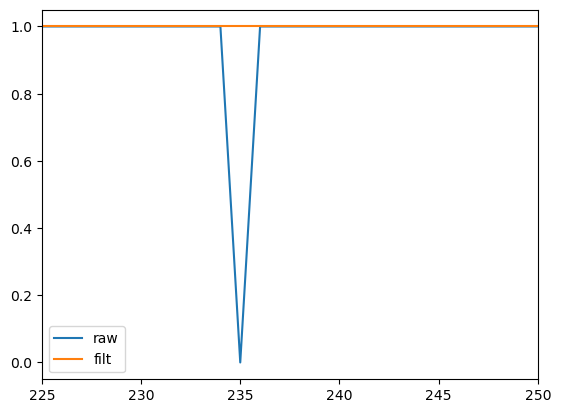

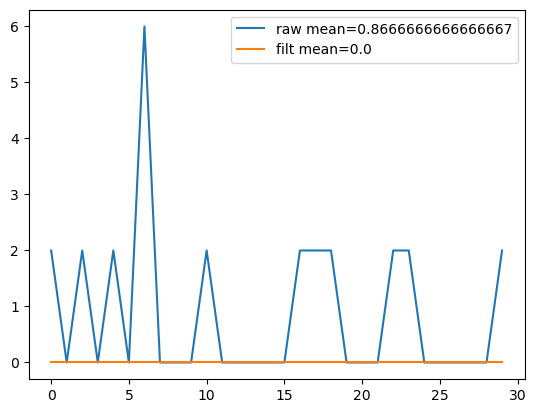

In [63]:
print('filt',filtwv[0])
plt.plot( parDecReadout, '-', label='raw')
plt.plot(filt, label='filt')
plt.legend()
plt.xlim(xmin=2, xmax=250)
plt.show()
plt.plot(roseqwvfm1, label=f'raw mean={np.mean(roseqwvfm1)}')
plt.plot(filtwv[0], label=f'filt mean={np.mean(filtwv[0])}')
plt.legend()
plt.show()

In [ ]:
#print(qpdecTaus)
plt.plot(nondecTaus)
plt.show()
plt.plot(qpdecTaus)
plt.show()
plt.hist(nondecTaus)
plt.show()
plt.hist(qpdecTaus)
# plt.plot( np.array(parDecReadoutTime)*1e-6, parDecReadout,  '-')
# plt.show()
# plt.plot(roseqwvfm25)
# plt.plot(np.array(decNonQPtimes)*1e-3, '*')
# plt.show()
# plt.plot(np.array(decQPtimes)*1e-3 , '*')

In [ ]:
t=np.linspace(0,700, 100)
print('len(decNonQPtimes)',len(decNonQPtimes))
print('len(decQPtimes)',len(decQPtimes))
nbin=100
plt.hist(np.array(decNonQPtimes)*1e-3, nbin)
#plt.plot(t, 1*np.exp(-(1/1)*t))
plt.xlabel('time us')
plt.show()
plt.hist(np.array(decQPtimes)*1e-3, nbin)
plt.xlabel('time us')

In [ ]:


edep= 0     #0.000004*1000#0.005#5000
mtime=5
maxtime_ms=mtime*1e-3   #numRatepts*timechunks #ns
ti=np.linspace(0,maxtime_ms,int(maxtime_ms/(50*1e-9)))

# prate, drate, rate_Dqp, rate_Dqp_base, full_rateDecqp, rate_P_no_State_change  =multiprocV4SepPar_and_StepIsLive.rates(edep,mtime)
plus=0
minus=0
reps=1
nodd_nonqpdecs =np.zeros(reps)
neven_nonqpdecs=np.zeros(reps)
nonqpdecs=np.zeros(reps)
wvs=np.zeros(10)
ssf=0.99

for i in tqdm(range(reps)):
    
    prate, drate, rate_Dqp, rate_Dqp_base, full_rateDecqp, rate_P_no_State_change, xqps, gqp  =multiprocV4SepPar_and_StepIsLive_Copy1.rates(edep,mtime)
    para=[ssf,edep,mtime]
    parDecReadout, parDecReadoutTime, averaged, time_for_averaged = multiprocV4SepPar_and_StepIsLive_Copy1.simstom(para)
    #print('lekelyE=',mostprobenergydep25)
    #wvs= wvs + roseqwvfm     #roseqwvfm 
    #print('pos, neg',pos, neg)
    # nonqpdecs[i]=nonqpdec
    # if pos==100000:
    #     plus=plus+1
    # elif neg==100000:
    #     minus=minus+1
    # else:
    #     print('plus', plus, 'neg',neg)

# print('plus: odd',plus)
# print('minus: even',minus)
# # print('nodd_nonqpdecs ',nodd_nonqpdecs )
# # print('neven_nonqpdecs',neven_nonqpdecs)
# print('nonqpdecs',nonqpdecs)
# print('nonqpdecs per bin',nonqpdecs/10)


In [ ]:
plt.plot(time_for_averaged, averaged)
print(len(averaged))

In [ ]:
# print('nonqpdecs mean',sum(nonqpdecs)/reps)
# print('nonqpdecs per bin mean',sum(nonqpdecs/10)/reps)
# print('wvs/reps',wvs/reps)
print('roseqwvfm25',roseqwvfm25)

In [ ]:
flipbti=np.linspace(0,maxtime_ms,11)#int(maxtime_ms/(4.4*1e-6*1e-9)))
ti=np.linspace(0,maxtime_ms,int(maxtime_ms/(50*1e-9)))
pts=24
rti=np.linspace(0,maxtime_ms,pts)#int(maxtime_ms/(4.4*1e-6)))

#plt.plot(ti*1e3, xqps)
print(len(xqps))
plt.ylabel('readout value 0 or 1')#('flips from bins of 225 measurements')#('Normalised Quasiparticle Density')
plt.xlabel('time ms')
plt.plot(np.array(parDecReadoutTime)*1e-6, parDecReadout,'-',  label='ro')
#plt.
# plt.show()
#plt.plot(ti,parity, '-', label='parity')
#plt.plot(ti,dec, '.', label='dec')
#plt.plot(ti,n_exc, '.', label='exc')
#plt.plot(ti, phis, label='phi')

#plt.axhline(y=0.5, linestyle='dashed', color='black')
#plt.xlim(xmin=0.5*1e-3, xmax=0.7*1e-3)
#plt.ylim(ymin=0.94, ymax=1.1)
#plt.legend()
# file=np.load(f'{edep}meVrates.npz')
# plt.plot(time, (file['rate_Dqp']+file['rate_Dqp'] + file['base_dec_rate'])*1e9)
#plt.plot(rti*1e3,roseqwvfm25, '-', label='roflips wv')
#plt.title(f'flip number waveform')
# plt.show()
# plt.plot(rti, decseqwvfm)
# plt.title(f'meanflips, 50reps, Edepo=0, T1=20us, ssf=0.95')
#plt.xlim(25*1e-4,50*1e-4)
#plt.plot(rti, wvs/100)
plt.title(f'Simulated Time Series Of Ramsey Parity Measurements\n After 5eV Deposition In An Aluminum Island')
bins=np.linspace(0.250,5.750,24)
for i in bins:
    plt.axvline(x=i, color='red')

In [46]:
start_time=time.time()
numberIter=16*1#313  #250#628#63#7#63
Edepos=[0]#, 250, 500, 1000, 2000]#, 5000]#[0, 50, 100, 250, 500, 1000]#, 5000, 10000]#, 500, 1000]#,1000]#,50,100,250,500,1000]#[0,50,100,150,200,250,500,750,1000]#,2000]
Eres=[]
ssfs= [0.98]#[0.97,0.98, 0.99, 0.995,0.998]#, 0.96, 0.97,0.98, 0.99, 0.995,0.998]#, 0.98, 0.99, 0.995, 0.998,  0.999]#,0.99]#[0.90, 0.93, 0.95, 0.98, 0.99]
T1s= [500, 1000, 2000,3000] #[50, 150, 200, 500, 1000, 2000]#, 3000, 4000, 5000]
xqpbases =  [1e-9] # [0.5*1e-8, 0.5*1e-7, 0.5*1e-6] #[1e-9, 1e-8, 1e-7, 1e-6, 1e-5 ] [  1e-8, 1e-7, 1e-6]



for num in range(0,10000):
    for xqpbase in xqpbases:
        for T1 in T1s:
            for ssf in ssfs:
                
                ssf =       ssf #0.98 #0.95 #1
                T1baseus = T1 #101 #1e9
                T2baseus = T1 #101 #1e9
                #T2baseus=T1
                xqpbase=  xqpbase # 1e-30 # #1e-9
                
                for j in tqdm(range(len(Edepos))):
                    res=[]
                    edep= Edepos[j]
                    maxtime_ms=  3.178 #ms
                    multiprocV4SepPar_and_StepIsLive_Fano.rates(edep,maxtime_ms, xqpbase, T1baseus, T2baseus)
        
                    ro            =[]
                    ro_time       =[]   
                    roseqwvfm25   = []
                    likeEs25      = []
                    roseqwvfm1   = []
                    likeEs1      = []
                    decNonQPtimes = []
                    decQPtimes = []
                    tpars = []
                    no_err = []
                    stuff=[]
                    roerr=[]
                    nonqpdec=[]
                    qpdec=[]
                    n_par=[]
                    # filtroseqwvfm25   = []
                    # filtroseqwvfm005  = []
                    # filtlikeEs25      = []
                    
                    
                    for i in tqdm(range(7)):
                        #iterlist=np.ones((16),dtype=int)
                        #start_time=time.time()
                        Edepo=Edepos[j]
                        #inteEdeps=[Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo, Edepo]
                        inteEdeps=[[ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms], [ssf, edep,maxtime_ms]]
                        #print(f'index, {i}')
                        if __name__=='__main__':
                            #print('main')
                            with multiprocessing.Pool(processes=16) as pool:
                                #print('about to map')
                                results=pool.map(multiprocV4SepPar_and_StepIsLive_Fano.sims,inteEdeps)
                                #print(Edepo)
                                #res=res+results
                                
                        #timetaken=time.time() - start_time
                        #print('timetaken for each iter',str(timetaken))
                        time.sleep(0.1)
                        
                        
                        
                        for i in range(len(results)):
                            ro.append(results[i][0])
                            ro_time.append(results[i][1])
                            # roseqwvfm25.append(results[i][2])
                            # likeEs25.append(results[i][3])
                            roseqwvfm1.append(results[i][2])
                            # stuff.append(results[i][4])
                            # roerr.append(results[i][5])
                            # nonqpdec.append(results[i][6])
                            # qpdec.append(results[i][7])
                            # n_par.append(results[i][8])
                            # likeEs1.append(results[i][3])
                            # if len(results[i][6])>0:
                            #     for p in results[i][6]:
                            #         decNonQPtimes.append(p)
                            #     #print('decNonQPtimes',decNonQPtimes)
                            # if len(results[i][7])>0:
                            #     for p in results[i][7]:
                            #         decQPtimes.append(p)
                            # if len(results[i][8])>0:
                            #     for p in results[i][8]:
                            #         tpars.append(p)
                            no_err.append(results[i][3])
                            
                            # #roseqwvfm005.append(results[i][3])
                            # filtroseqwvfm25.append(results[i][5])
                            # #filtroseqwvfm005.append(results[i][5])
                            
                            
                            # filtlikeEs25.append(results[i][6])
                            #likeEs005.append(results[i][7])
                            
                            #filtlikeEs005.append(results[i][10])
                            # npar.append(results[i][8])
                            # n_gs.append(results[i][9])
                            # n_ph.append(results[i][10])
                            # likeEs01.append(res[i][6])
                            # likeEs005.append(res[i][7])
                            # parDecReadout_correct.append(res[i][5])
                            # n_ssferr.append(res[i][6])
                            # decseqwvfm.append(results[i][3])
                            # nonqpdecseqwvfm.append(results[i][4])
                            # qpdecseqwvfm.append(results[i][5])
                            # dec_idtseqwvfm.append(res[i][8])
                            # dec_roseqwvfm.append(res[i][9])
                            # parseqwvfm.append(res[i][10])
                            # exc_idtseqwvfm.append(res[i][11])
                            # exc_rowvfm.append(res[i][12])
                            # excseqwvfm.append(res[i][13])
                            # ev0seqwvfm.append(res[i][14])
                            # ev1seqwvfm.append(res[i][15])
                            # od0seqwvfm.append(res[i][16])
                            # od1seqwvfm.append(res[i][17])
                            # ev0_ro.append(res[i][18])
                            # ev1_ro.append(res[i][19])
                            # od0_ro.append(res[i][20])
                            # od1_ro.append(res[i][21])
                           
                            #if len(ev_1)>numberIter:
                            #    print('errorr!!!!!!!!!!!!!!!!!!')
                        if ssf==0.9:
                            fid='090'
                        elif ssf==0.93:
                            fid='093'
                        elif ssf==0.95:
                            fid='095'
                        elif ssf==0.97:
                            fid='097'
                        elif ssf==0.96:
                            fid='096'
                        elif ssf==0.98:
                            fid='098'
                        elif ssf==0.99:
                            fid='099'
                        elif ssf==0.995:
                            fid='0995'
                        elif ssf==0.998:
                            fid='0998'
                        elif ssf==0.999:
                            fid='0999'
                        elif ssf==1:
                            fid='1'
        
                        if xqpbase == 1e-10:
                            xqpower=10
                        if xqpbase == 1e-9:
                            xqpower=9
                        if xqpbase == 0.5*1e-9:
                            xqpower='half9'
                        if xqpbase == 1e-8:
                            xqpower=8
                        if xqpbase == 0.5*1e-8:
                            xqpower='half8'
                        if xqpbase == 1e-7:
                            xqpower=7
                        if xqpbase == 0.5*1e-7:
                            xqpower='half7'
                        if xqpbase == 1e-6:
                            xqpower=6
                        if xqpbase == 0.5*1e-6:
                            xqpower='half6'
                        if xqpbase == 1e-5:
                            xqpower=5
                        if xqpbase == 1e-30:
                            xqpower='minus30'
                        Folder = os.path.abspath(fr"C:\Users\Kester\Desktop\some stuff\PhD Research-20211021T212142Z-001\PhD Research\Jump Probability Calculations\constant random\Mar_6_2025\Doing_Par00_and_Par_11_Fano\allnew")#\ssf{fid}withrollavg_infT1T2_xqp0_minus9")
                        np.savez(Folder + f'\\{Edepos[j]}_with_ngs_T1_{T1baseus}us_roT_0_2us_SSF_{fid}_112reps_xqp_{xqpower}_part{num}.npz', ro = ro , ro_time   = ro_time ,  roseqwvfm1 = roseqwvfm1, no_err=no_err)#, stuff=stuff, roerr=roerr, nonqpdec=nonqpdec, qpdec=qpdec, n_par=n_par )#, likeEs1=likeEs1) #, decNonQPtimes=decNonQPtimes, decQPtimes=decQPtimes, tpars=tpars, no_err=no_err)  #,  parity  = parity, likeEs25=likeEs25 ,  filtlikeEs25=filtlikeEs25 , filtroseqwvfm25 = filtroseqwvfm25) #,,  roseqwvfm005 = roseqwvfm005 ,    likeEs005=likeEs005,  filtroseqwvfm005 = filtroseqwvfm005 ,  filtlikeEs005=filtlikeEs005, npar=npar, n_gs=n_gs, n_ph=n_ph )   #,parDecReadout_correct = parDecReadout_correct  ,n_ssferr = n_ssferr,decseqwvfm  = decseqwvfm  ,dec_idtseqwvfm = dec_idtseqwvfm ,dec_roseqwvfm  = dec_roseqwvfm ,parseqwvfm  = parseqwvfm  ,exc_idtseqwvfm = exc_idtseqwvfm ,exc_rowvfm = exc_rowvfm  ,excseqwvfm  = excseqwvfm ,ev0seqwvfm  = ev0seqwvfm ,ev1seqwvfm = ev1seqwvfm ,od0seqwvfm  = od0seqwvfm ,od1seqwvfm  = od1seqwvfm ,ev0_ro = ev0_ro  ,ev1_ro = ev1_ro ,od0_ro  = od0_ro ,od1_ro  = od1_ro )
                    #Eres.append(res)us_roTime
            #np.savez(f'{Edepos[j]}_readout_readouttime30slong', Eres=Eres)
                        
        #print(Eres)
        timetaken=time.time() - start_time
        print('timetaken',str(timetaken))

  0%|                                                                                            | 0/1 [00:28<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
Edepos=[1000]
fid='098'
T1baseus=2000
num=0
j=0
a=[0,00,1]
Folder = os.path.abspath(fr"C:\Users\Kester\Desktop\some stuff\PhD Research-20211021T212142Z-001\PhD Research\Jump Probability Calculations\constant random\Mar_6_2025\Doing_Par00_and_Par_11_Fano\dataOne_eV")
np.savez(Folder + f'\\{Edepos[j]}_with_ngs_T1_{T1baseus}us_roT_0_2us_SSF_{fid}_112reps_part{num}.npz', a = a)

In [ ]:
file=np.load('1000_probscheck_T1_20us_roT_2us_SSF_095_512reps.npz')
print(file)
# print(file)
# #tim=np.linspace(0,5*1e-3, )
# #decidtwvfms=[]
# # decrowvfms=[]
# # ev0wvfms=[]
# # od0wvfms=[]
# # ev1wvfms=[]
# # od1wvfms=[]
# #pwvfm=np.zeros(10)
ros=[]
binwidth=0.5*1e-3
timestep=50*1e-9
maxt=5*1e-3
ti=np.linspace(0,maxt,int(maxt/(50*1e-9)) )
ramseymeas_len=4.4*1e-6
for i in tqdm(range(1008)):
    # parity=np.zeros((100000))
    # for j in range(100000):
    #     parity[j]=res[i][3][j][3]
    ro=file['ro'][i]
    #decidt=file['dec_idt'][i]
    # decro=file['dec_ro'][i] #file['resro'][i]
    # ev0  =file['ev_0'][i]
    # od0  =file['od_0'][i]
    # ev1  =file['ev_1'][i]
    # od1  =file['od_1'][i]
    # tru=file['restruflp'][i]
    parity=file['parity']
    #print(tru)
    routT=file['ro_time'][i]
    rowfm, numrepsInBin, btimes = waveAndLike.Makewaveform_from_ones(np.array(parity), ti, binwidth, timestep)#ramseymeas_len)
    #decidtwvfm, numrepsInBin, btimes = waveAndLike.Makewaveform(np.array(decidt), ti, binwidth, timestep)
    # decrowvfm, numrepsInBin, btimes = waveAndLike.Makewaveform(np.array(decro), ti, binwidth, timestep) 
    # ev0wvfm, numrepsInBin, btimes   = waveAndLike.Makewaveform(np.array(ev0  ), ti, binwidth, timestep) 
    # od0wvfm, numrepsInBin, btimes   = waveAndLike.Makewaveform(np.array(od0  ), ti, binwidth, timestep) 
    # ev1wvfm, numrepsInBin, btimes   = waveAndLike.Makewaveform(np.array(ev1  ), ti, binwidth, timestep) 
    # od1wvfm, numrepsInBin, btimes   = waveAndLike.Makewaveform(np.array(od1  ), ti, binwidth, timestep) 
    ros.append(rowfm)
    #decidtwvfms.append(decidtwvfm)
    # decrowvfms.append(decrowvfm)
    # ev0wvfms.append(ev0wvfm)
    # od0wvfms.append(od0wvfm)
    # ev1wvfms.append(ev1wvfm)
    # od1wvfms.append(od1wvfm)
    #print(numrepsInBin)  #(len(wvfm))
    #pwvfm=pwvfm+wvfm
    #plt.plot(btimes, wvfm)

In [ ]:
file=np.load('1000_probscheck_T1_20us_roT_2us_SSF_095_5000reps.npz')
num=6
btimes=np.linspace(0, 3*1e-3, num)
wvs=np.zeros((num))
for i in range(1008):
    plt.plot(btimes, file['roseqwvfm'][i])
    wvs=wvs+ file['roseqwvfm'][i]
bin=0.5*1e-3
plt.show()
plt.plot(btimes, (wvs/1008))
# plt.title

In [ ]:
ssf=0.95
baseT1=20#us
basePar=0.1
Edep=1000
Nperbin=113
num=10
btimes=np.linspace(0, 5*1e-3, num)

likesE=[]

for i in tqdm(range(5008)):
    file=np.load('1000_probscheck_T1_20us_roT_2us_SSF_095_5000reps.npz')
    waveform=file['roseqwvfm'][i]
    mostprobenergydep, likes, Pjump = waveAndLike.likelihoodEdep(ssf, basePar,  baseT1,   waveform, btimes, Nperbin)
    likesE.append(mostprobenergydep)
    #print(mostprobenergydep)

#

In [ ]:
Pjump = waveAndLike.probs(ssf, baseT1, basePar, 1000, Nperbin, btimes)
#print(likesE)
plt.plot(btimes*1e3, (wvs/512), label='mean wvfm: sims data')
plt.plot(btimes*1e3, Pjump*113, label='calculated expected wvfm')
plt.title('Comparing Sims mean wvfm to Calculated Expected wvfm')
plt.ylabel('number of flips')
plt.xlabel('time ms')
plt.legend()

In [ ]:
plt.hist(likesE, 100)
plt.title('Energy Reconstruction Distribution')
plt.xlabel('Energy eV')
plt.ylabel('counts')
# plt.pl

In [ ]:
file=np.load('1000_probscheck_T1_20us_roT_2us_SSF_095_5000reps.npz')
Es=[]
for i in range(5008):
    Es.append(file['likeEs'][i])
    

In [ ]:
#Es=np.array([Es])

plt.hist(Es, 100, log=True)

In [ ]:
# decroall=np.zeros((10,1008))
# decidtall=np.zeros((10,1008))
read=np.zeros((10,1008))
rosall=np.zeros((10,1008))
#print(len(ros))
for i in tqdm(range(10)):
    for j in range(512):
        # decroall[i][j]=decrowvfms[j][i]
        # decidtall[i][j]=decidtwvfms[j][i]
        rosall[i][j]=ros[j][i]

In [ ]:
# decidtmeanflips=np.zeros(10)
# decromeanflips=np.zeros(10)
readmeanflips=np.zeros(10)
rosmean=np.zeros(10)
stdflips=np.zeros(10)
for i in range(10):
    # decidtmeanflips[i]=np.mean(decidtall[i])
    # decromeanflips[i]=np.mean(decroall[i])
    stdflips[i]=np.std(rosall[i])
    rosmean[i]=np.mean(rosall[i])


plt.plot(btimes*1e-6, rosmean)
#plt.plot(btimes*1e-6, (decidtmeanflips + decromeanflips)/(0.5*1e-3))
#plt.errorbar(btimes*1e-6, rosmean, yerr = stdflips, fmt ='o')
plt.xlabel('time us')
plt.ylabel('meanflips')
T1='20us'
SSF=0.95
bsPRate=0.1
E=0
plt.title(f'meanflips from sims\n E={E}meV,T1={T1}us, SSF={SSF}, basePRate={bsPRate}Hz')
#print(sum(idt[12])/10)

In [ ]:
Edepos=1000
index=1
ssf=0.95
basePar=0.1
baseT1=20
rawWave05=rosmean
moreparams=[ssf, basePar, baseT1]
#params= [filename, Edepos, index, moreparams ]
time25=np.linspace(0,5*1e-3, 10)
#rawWave025, numrepsInBinrawWave025, BinrawWave025time                      =Makewaveform(seq, seqT, binwidt025, ramseymeas_len)
#print('len of rawWave025', len(rawWave025))
rawWave05likeEdeo    , likes   ,  Pjump                                                  =waveAndLike.likelihoodEdep(ssf, basePar,  baseT1,   rawWave05, time25, 10)
#print('rawWave05likeEdeo=',rawWave05likeEdeo, 'likes', likes)#, 'Pjump',Pjump)

In [ ]:

def probCalc(SSF, base_par_rate, edep, bsT1, bintimes, Nperbin, waveform):
    #base_par_rate, Edep, bsT1, bintimes, Nperbin, waveform
    ssf=SSF
    hbar_ev=6.5821*1e-16 #eVs
    hbar_js=1.054571817*1e-34 #Js
    Ej=hbar_ev*(2*np.pi)*9.945*1e9 #J
    Ec=hbar_ev*(2*np.pi)*390*1e6 #J
    supcon_gap_Al=180*1e-6 #eV
    Ege=np.sqrt(8*Ej*Ec)-Ec #J 
    wq=Ege/hbar_ev
    fq=wq/(2*np.pi)
    #print('fq=',fq*1e-6,'MHz')
    adf=16*np.sqrt(2/np.pi)*(Ec/hbar_ev)
    bdf=((Ej/Ec/2)**(3/4))
    cdf=np.exp(-1*np.sqrt(8*Ej/Ec))
    ddf=(16*((Ej/Ec/2)**(1/2)) + 1)
    dwq=adf*bdf*cdf*ddf
    dfq=dwq/(2*np.pi)
    
    kb_ev=8.6173303*1e-5 #eV/K
    T=20*1e-3 #K
    r0=0.018/1e-9 #Hz
    s0=1e-6/1e-9 #Hz
    ncp=4*1e24 #m^-3
    V_island=2400*((1e-6)**3) #m^3
    phonon_to_qp_eff=0.57
    base_Par_Rate=base_par_rate    #Hz
    
    Edeposited=edep*1e-3 #eV
    
    xinduced=Edeposited*phonon_to_qp_eff / (ncp*V_island*supcon_gap_Al)
    #np.sqrt((2*(2*np.pi*fq)*gpeV)/(np.pi*np.pi*h_bareV_Hz))*1e-9
    decayRateCoeff=np.sqrt((2*wq*supcon_gap_Al)/(np.pi*np.pi*hbar_ev))#(16*Ej/(hbar_ev*np.pi)) * np.sqrt(Ec/(8*Ej)) * (supcon_gap_Al/(2*hbar_ev*wq))
    baseT1=bsT1*1e-6 #s
    #print(Edeposited, 'eV', ssf, 'ssf', 'base_Par_Rate', base_Par_Rate, 'baseT1',baseT1)
    #print('baseT1',baseT1)
    baseDecayRate=1/baseT1
    #print('base non qp decay rate=',baseDecayRate)
    #16*(Ej*heV_Hz/(h_bareV_Hz*np.pi))*np.sqrt(kbeV_K*T/(2*np.pi*gpeV))
    parRateCoeff_v1=(16*Ej / (hbar_ev * np.pi))  *  np.sqrt(kb_ev*T/(2*np.pi*supcon_gap_Al))
    
    
    half_x_pi_len=100*1e-9
    half_y_pi_len=100*1e-9
    rolen=2*1e-6
    idlen=1/(4*dfq)
    actlen=2*1e-6
    ramseymeas_len=half_x_pi_len + idlen + half_y_pi_len + rolen + actlen
    #binwidth=bwidth
    #binwidth=0.5*1e-3
    N=Nperbin     # int(binwidth/ramseymeas_len)
    maxtime=5.0*1e-3
    #num_pts=int(maxtime/binwidth)+1 #50ns timestep
    #E_depo_timestream=np.zeros(num_pts) #ns Energy depo into the island
    #E_depo_timestream[0]=EeV #eV
    
    time=bintimes #*1e-9  #np.linspace(0,maxtime,num_pts) #ns
    Ptotal  =np.zeros(len(time))
    
    P_oddtotal          =np.zeros(len(time))
    P_eventotal          =np.zeros(len(time))
    P_odd0              =np.zeros(len(time))
    P_odd1              =np.zeros(len(time))
    P_oddg              =np.zeros(len(time))
    P_odde              =np.zeros(len(time))
    P_odd0           =np.zeros(len(time))
    P_odd1           =np.zeros(len(time))
    P_oddg           =np.zeros(len(time))
    P_odde           =np.zeros(len(time))
    
    P_even0              =np.zeros(len(time))
    P_even1              =np.zeros(len(time))
    P_eveng              =np.zeros(len(time))
    P_evene              =np.zeros(len(time))
    
    P_even0           =np.zeros(len(time))
    P_even1           =np.zeros(len(time))
    P_eveng           =np.zeros(len(time))
    P_evene           =np.zeros(len(time))
    
    P_eveng              =np.zeros(len(time))
    P_evene              =np.zeros(len(time))
        
    Pe                  =np.zeros(len(time))
    Po                  =np.zeros(len(time))
    PestartPe           =np.zeros(len(time))
    PestartPo           =np.zeros(len(time))
    PostartPo           =np.zeros(len(time))
    PostartPe           =np.zeros(len(time))
    Podd_dec_id         =np.zeros(len(time))
    Podd_dec_ro         =np.zeros(len(time))
    Peven_dec_id        =np.zeros(len(time))
    Peven_dec_ro        =np.zeros(len(time))
    
    
    QP_P_eventotal          =np.zeros(len(time))
    P_even0              =np.zeros(len(time))
    P_even1              =np.zeros(len(time))
    
    Pjump        =np.zeros(len(time))
    Pnojump        =np.zeros(len(time))
    Prob_of_Nflips=np.zeros(len(time))
    Expectedjumps=np.zeros(len(time))
    
    ramseyxqp_v1=np.zeros(len(time))
    ramseyParRate_v1=np.zeros(len(time))
    ramseydecayrate=np.zeros(len(time))
    ramseydecayrate_qp=np.zeros(len(time))
    ramseyexcrate       =np.zeros(len(time))
    ramseyexcrate_qp    =np.zeros(len(time))
    ramseyParRate_v1_nostate_change=np.zeros(len(time))
    
    
    
    Prob_decNonQP_idt   =np.zeros(len(time))
    Prob_decQP_idt      =np.zeros(len(time))
    Prob_excNonQP_idt   =np.zeros(len(time))
    Prob_excQP_idt      =np.zeros(len(time))
    Prob_decNonQP_ro   =np.zeros(len(time))
    Prob_decQP_ro      =np.zeros(len(time))
    Prob_excNonQP_ro   =np.zeros(len(time))
    Prob_excQP_ro      =np.zeros(len(time))
    Prob_Par_meas_Nochange=np.zeros(len(time))
    Prob_Par_meas_NochangeB4RO=np.zeros(len(time))
    Prob_Par_meas_NochangeAFY2=np.zeros(len(time))
    Prob_deph_idt=np.zeros(len(time))
    Prob_Par_meas=np.zeros(len(time))
    
    Prob_dec_x          =np.zeros(len(time))
    Prob_dec_idt        =np.zeros(len(time))
    Prob_dec_y          =np.zeros(len(time))
    Prob_dec_ro         =np.zeros(len(time))
    Prob_Par_meas       =np.zeros(len(time))
    Prob_exc_x          =np.zeros(len(time))
    Prob_exc_idt        =np.zeros(len(time))
    Prob_exc_y          =np.zeros(len(time))
    Prob_exc_ro         =np.zeros(len(time))
    Prob_exc_deph_idt   =np.zeros(len(time))
    Prob_g_none_idt     =np.zeros(len(time))
    Prob_g_idt          =np.zeros(len(time))
    Prob_none_idt       =np.zeros(len(time))
    Prob_deph_idt       =np.zeros(len(time))
    Prob_dec_or_exc_meas=np.zeros(len(time))
    
    Prob_none_meas=np.zeros(len(time))
    
    dephasingrate       =np.zeros(len(time))
    idt_evenNon             =np.zeros(len(time))
    idt_oddNon              =np.zeros(len(time))
    idt_evenNonQPdec        =np.zeros(len(time))
    idt_oddNonQPdec         =np.zeros(len(time))
    idt_evenNonQPexc     =np.zeros(len(time))
    idt_oddNonQPexc      =np.zeros(len(time))
    idt_evenNonPar          =np.zeros(len(time))
    idt_oddNonPar           =np.zeros(len(time))
    idt_evenQPdec        =np.zeros(len(time))
    idt_oddQPdec         =np.zeros(len(time))
    idt_evenQPexc     =np.zeros(len(time))
    idt_oddQPexc      =np.zeros(len(time))
    fullIDT       =np.zeros(len(time))
    
    ro_nonidt_evenNon             =np.zeros(len(time))
    ro_nonidt_oddNon              =np.zeros(len(time))
    ro_nonidt_evenNonQPdec        =np.zeros(len(time))
    ro_nonidt_oddNonQPdec         =np.zeros(len(time))
    ro_nonidt_evenNonQPexc     =np.zeros(len(time))
    ro_nonidt_oddNonQPexc      =np.zeros(len(time))
    ro_nonidt_evenNonPar          =np.zeros(len(time))
    ro_nonidt_oddNonPar           =np.zeros(len(time))
    ro_nonidt_evenQPdec        =np.zeros(len(time))
    ro_nonidt_oddQPdec         =np.zeros(len(time))
    ro_nonidt_evenQPexc     =np.zeros(len(time))
    ro_nonidt_oddQPexc      =np.zeros(len(time))
    full_nonidt_ro          =np.zeros(len(time)) 
    
    ro_paridt_evenNon             =np.zeros(len(time))
    ro_paridt_oddNon              =np.zeros(len(time))
    ro_paridt_evenNonQPdec        =np.zeros(len(time))
    ro_paridt_oddNonQPdec         =np.zeros(len(time))
    ro_paridt_evenNonQPexc     =np.zeros(len(time))
    ro_paridt_oddNonQPexc      =np.zeros(len(time))
    ro_paridt_evenNonPar          =np.zeros(len(time))
    ro_paridt_oddNonPar           =np.zeros(len(time))
    ro_paridt_evenQPdec        =np.zeros(len(time))
    ro_paridt_oddQPdec         =np.zeros(len(time))
    ro_paridt_evenQPexc     =np.zeros(len(time))
    ro_paridt_oddQPexc      =np.zeros(len(time))
    full_paridt_ro          =np.zeros(len(time)) 
    
    ro_par_dec_exc_idt_evenNon             =np.zeros(len(time))
    ro_par_dec_exc_idt_oddNon              =np.zeros(len(time))
    ro_par_dec_exc_idt_evenNonQPdec        =np.zeros(len(time))
    ro_par_dec_exc_idt_oddNonQPdec         =np.zeros(len(time))
    ro_par_dec_exc_idt_evenNonQPexc     =np.zeros(len(time))
    ro_par_dec_exc_idt_oddNonQPexc      =np.zeros(len(time))
    ro_par_dec_exc_idt_evenNonPar          =np.zeros(len(time))
    ro_par_dec_exc_idt_oddNonPar           =np.zeros(len(time))
    ro_par_dec_exc_idt_evenQPdec        =np.zeros(len(time))
    ro_par_dec_exc_idt_oddQPdec         =np.zeros(len(time))
    ro_par_dec_exc_idt_evenQPexc     =np.zeros(len(time))
    ro_par_dec_exc_idt_oddQPexc      =np.zeros(len(time))
    full_par_dec_exc_idt_ro          =np.zeros(len(time)) 
    
    P_0                              = np.zeros(len(time))
    P_1                              = np.zeros(len(time))
    
    Pflip                            =  np.zeros(len(time))   
    Pnoflip                          =  np.zeros(len(time))
    
    test                             =np.zeros(len(time))
    test2                            =np.zeros(len(time))
    
    P_oddg_pswt                      =np.zeros(len(time))
    P_oddg_no_pswt_or_cancel         =np.zeros(len(time))
    
    P_odde_pswt                      =np.zeros(len(time))
    P_odde_no_pswt_or_cancel         =np.zeros(len(time))
    
    P_eveng_pswt                      =np.zeros(len(time))
    P_eveng_no_pswt_or_cancel         =np.zeros(len(time))
    P_evene_pswt                      =np.zeros(len(time))
    P_evene_no_pswt_or_cancel         =np.zeros(len(time))
    all=np.zeros(len(time))
    lamda=np.zeros(len(time))
    
    P_odd0_pswt=np.zeros(len(time))
    P_odd1_pswt=np.zeros(len(time))
    P_even0_pswt=np.zeros(len(time))
    P_even1_pswt=np.zeros(len(time))
    
    P_odd0_no_pswt_or_cancel=np.zeros(len(time))
    P_odd1_no_pswt_or_cancel=np.zeros(len(time))
    
    P_even0_no_pswt_or_cancel=np.zeros(len(time))
    P_even1_no_pswt_or_cancel=np.zeros(len(time))
    
    
    
    for i,ti in enumerate(time):
        #rolen=j*1e-6
        x0_v1= base_Par_Rate / (parRateCoeff_v1 + decayRateCoeff +  (decayRateCoeff * np.exp(-1*hbar_ev*wq/(kb_ev*T))))
        #print('baseParRate',baseParRate)
        #print('xo_v1',x0_v1)
    
        g_v1 = ((2*r0*x0_v1 + s0)*(2*r0*x0_v1 + s0) - s0*s0) / (4*r0)
        tss_v1= 1 / (2*r0*x0_v1 + s0)
        rprime_v1= r0*tss_v1*xinduced / (1 + r0*tss_v1*xinduced)
     
        
        ramseyxqp_v1[i]=((xinduced * (1-rprime_v1))/ (np.exp(ti/tss_v1) - rprime_v1)) + x0_v1 # a/exp(t/tss) + b
        ramseydecayrate_qp[i]=decayRateCoeff * ramseyxqp_v1[i]
        ramseydecayrate[i]=ramseydecayrate_qp[i] + baseDecayRate
        ramseybaseExcrate=baseDecayRate*np.exp(-1*hbar_ev*wq/(kb_ev*T))
        ramseyexcrate_qp[i]=ramseydecayrate_qp[i]  * np.exp(-1*hbar_ev*wq/(kb_ev*T))
        ramseyParRate_v1_nostate_change[i]= parRateCoeff_v1 * ramseyxqp_v1[i]
        ramseyParRate_v1[i]=ramseyParRate_v1_nostate_change[i] +  ramseydecayrate_qp[i] + ramseyexcrate[i]
        dephasingrate[i]=0
        basePar= (parRateCoeff_v1 + decayRateCoeff +  (decayRateCoeff * np.exp(-1*hbar_ev*wq/(kb_ev*T))))* x0_v1
        #print('baseParQP',basePar)
        Ce2_idt=0.5
        Cg2_idt=0.5
        Prob_decNonQP_idt[i]=Ce2_idt*(1-np.exp(-1*idlen*baseDecayRate))
        Prob_decQP_idt[i]=Ce2_idt*(1-np.exp(-1*idlen*ramseydecayrate_qp[i]))
    
        Prob_excNonQP_idt[i]=Cg2_idt*(1-np.exp(-1*idlen*ramseybaseExcrate))
        Prob_excQP_idt[i]=Cg2_idt*(1-np.exp(-1*idlen*ramseyexcrate_qp[i]))
    
    
        
        Prob_decNonQP_ro[i]=(1-np.exp(-1*rolen*baseDecayRate))
        Prob_decQP_ro[i]=(1-np.exp(-1*rolen*ramseydecayrate_qp[i]))
        #print(Prob_dec_ro[i])
    
        
    
        Prob_excNonQP_ro[i]=(1-np.exp(-1*rolen*ramseybaseExcrate))
        Prob_excQP_ro[i]=(1-np.exp(-1*rolen*ramseyexcrate_qp[i]))
        
        
        Prob_deph_idt[i]=1-np.exp(-1*idlen*dephasingrate[i])
        
        Prob_Par_meas[i]=(ramseymeas_len*ramseyParRate_v1[i])* np.exp(-1*ramseymeas_len*ramseyParRate_v1[i])   #1-np.exp(-1*ramseymeas_len*ramseyParRate_v1[i])
        B4RO=400*1e-9
        Prob_Par_meas_NochangeB4RO[i]=1-np.exp(-1*B4RO*ramseyParRate_v1_nostate_change[i]) #(ramseymeas_len*ramseyParRate_v1[i])* np.exp(-1*ramseymeas_len*ramseyParRate_v1[i])
        AFY2=4000*1e-9
        Prob_Par_meas_NochangeAFY2[i]=1-np.exp(-1*AFY2*ramseyParRate_v1_nostate_change[i])
        #ro[i]=(Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i]) + 2*Prob_dec_ro[i]*Prob_exc_ro[i] + (1-Prob_dec_ro[i])*(1-Prob_exc_ro[i]))
        Prob_dec_or_exc_meas[i]= ((Prob_dec_idt[i]*(1-Prob_exc_idt[i]) + Prob_exc_idt[i]*(1-Prob_dec_idt[i]) + 2*Prob_dec_idt[i]*Prob_exc_idt[i]))*(Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i]) + 2*Prob_dec_ro[i]*Prob_exc_ro[i] + (1-Prob_dec_ro[i])*(1-Prob_exc_ro[i]))  + (1-Prob_dec_idt[i])*(1-Prob_exc_idt[i]) *(Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i]) + 2*Prob_dec_ro[i]*Prob_exc_ro[i] + (1-Prob_dec_ro[i])*(1-Prob_exc_ro[i]))
        #Prob_dec_or_exc_meas[i]= ((Prob_dec_idt[i]*(1-Prob_exc_idt[i]) + Prob_exc_idt[i]*(1-Prob_dec_idt[i]) + 2*(Prob_dec_idt[i]*(1-Prob_exc_idt[i]) * Prob_exc_idt[i]*(1-Prob_dec_idt[i]))))*(Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i]) + 2*(Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i])) + (1-Prob_dec_ro[i])*(1-Prob_exc_ro[i]))  + (1-Prob_dec_idt[i])*(1-Prob_exc_idt[i]) * (Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i]) + 2*(Prob_dec_ro[i]*(1-Prob_exc_ro[i]) + Prob_exc_ro[i]*(1-Prob_dec_ro[i]))) 
        Prob_none_meas[i]=(1-Prob_dec_idt[i])*(1-Prob_exc_idt[i])*(1-Prob_dec_ro[i])*(1-Prob_exc_ro[i])
        all[i]= Prob_dec_or_exc_meas[i]#+Prob_none_meas[i]
        
        ##Cases during idt when qubit is excited: only dec, only deph, nothing, some combo of dec and deph
    
    
        #during readout: when qubit is excited only dec or nothing and when qubit is in g, only exc or nothing
        #When nothing happens in idt, during ro, the qubit is excited when parity is odd and qubit is in g when parity is even
        #When nothing happens in idt for odd parity, the Ce2=1 so there can be dec or nothing
        Ce2oddRO_noneidt=1
        Cg2oddRO_noneidt=0
        Ce2evenRO_noneidt=0
        Cg2evenRO_noneidt=1
        #Odd parity
        #Odd parity nothing in idt, dec in ro
        
    
        #cases where stuff happen in idt
        #Odd parity, dec in idt, will cause Ce2=0.5 during ro so dec or exc can hapen during ro
        Ce2RO_decidt=0.5
        Cg2RO_decidt=0.5
        
        # excitation in idt will also casue the same results decay in idt.
        Ce2RO_excidt=0.5
        Ce2RO_dec_or_excidt=0.5
        Cg2RO_excidt=0.5
        Cg2RO_dec_or_excidt=0.5
        #############################################################
        lamda[i]=integrate.simpson(ramseyParRate_v1[:i+1], time[:i+1])
        evenNum_ofswts = (pow(lamda[i],0) * np.exp(-1*lamda[i]) / math.factorial(0)) + (pow(lamda[i],2) * np.exp(-1*lamda[i]) / math.factorial(2)) + (pow(lamda[i],4) * np.exp(-1*lamda[i]) / math.factorial(4)) + (pow(lamda[i],6) * np.exp(-1*lamda[i]) / math.factorial(6)) + (pow(lamda[i],8) * np.exp(-1*lamda[i]) / math.factorial(8)) + (pow(lamda[i],10) * np.exp(-1*lamda[i]) / math.factorial(10))
        PestartPe[i]   = 0.5*evenNum_ofswts#1-Prob_Par_meas[i]
        PostartPe[i]   = 0.5*(1-evenNum_ofswts)#0.5*(pow(lamda[i],1) * np.exp(-1*lamda[i]) / math.factorial(1)) + (pow(lamda[i],3) * np.exp(-1*lamda[i]) / math.factorial(3)) + (pow(lamda[i],5) * np.exp(-1*lamda[i]) / math.factorial(5)) + (pow(lamda[i],7) * np.exp(-1*lamda[i]) / math.factorial(7)) + (pow(lamda[i],9) * np.exp(-1*lamda[i]) / math.factorial(9)) + (pow(lamda[i],11) * np.exp(-1*lamda[i]) / math.factorial(11))#1-Prob_Par_meas[i]
        PostartPo[i]   =0.5*evenNum_ofswts
        PestartPo[i]   =0.5*(1-evenNum_ofswts)
        Pe[i]          = 0.5 #PestartPe[i]+PostartPe[i]
        Po[i]          = 0.5 #PostartPo[i]+PestartPo[i]#PostartPo[i]+PostartPe[i]
    
        ####################################################################################################################################
        ########## IDT ##################################################################################################################
        ####### Non
        idt_evenNon[i]=Pe[i]* (1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        idt_oddNon[i] =Po[i]* (1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        #idt_###### decNonQP
        idt_evenNonQPdec[i]=Pe[i]* (Prob_decNonQP_idt[i]) #*(1- (Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        idt_oddNonQPdec[i] =Po[i]* (Prob_decNonQP_idt[i]) #*(1- (Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        #idt_###### excNonQP
        idt_evenNonQPexc[i]=Pe[i]* (Prob_excNonQP_idt[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        idt_oddNonQPexc[i] =Po[i]* (Prob_excNonQP_idt[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        #idt_###### NonPar
        idt_evenNonPar[i]=Pe[i]* (Prob_Par_meas_NochangeB4RO[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] ))
        idt_oddNonPar[i] =Po[i]* (Prob_Par_meas_NochangeB4RO[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] ))
        #idt_###### decQP
        idt_evenQPdec[i]=Pe[i]* (Prob_decQP_idt[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        idt_oddQPdec[i] =Po[i]* (Prob_decQP_idt[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_excNonQP_idt[i] + Prob_excQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        #idt_###### excQP
        idt_evenQPexc[i]=Pe[i]* (Prob_excQP_idt[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        idt_oddQPexc[i] =Po[i]* (Prob_excQP_idt[i]) #*(1- (Prob_decNonQP_idt[i] + Prob_decQP_idt[i] + Prob_excNonQP_idt[i] + Prob_Par_meas_NochangeB4RO[i]))
        ######### full IDT
        fullIDT[i]=idt_evenNon[i]+idt_oddNon[i]+idt_evenNonQPdec[i]+idt_oddNonQPdec[i]+idt_evenNonQPexc[i]+idt_oddNonQPexc[i]+idt_evenNonPar[i]+idt_oddNonPar[i]+idt_evenQPdec[i]+idt_oddQPdec[i]+idt_evenQPexc[i]+idt_oddQPexc[i]
        ####################################################################################################################################
        ########## RO ##################################################################################################################
        #### No id event ############################################################################################################################################
        ro_nonidt_evenNon[i]= (1- (Ce2evenRO_noneidt*(Prob_decNonQP_ro[i]+Prob_decQP_ro[i])  +  Cg2evenRO_noneidt*(Prob_excNonQP_ro[i]+Prob_excQP_ro[i]) + Prob_Par_meas_NochangeAFY2[i]))
        ro_nonidt_oddNon[i] = (1- (Ce2oddRO_noneidt*(Prob_decNonQP_ro[i]+Prob_decQP_ro[i])   +  Cg2oddRO_noneidt*( Prob_excNonQP_ro[i]+Prob_excQP_ro[i]) + Prob_Par_meas_NochangeAFY2[i]))
        #ro_###### decNonQP
        ro_nonidt_evenNonQPdec[i]= Ce2evenRO_noneidt*(Prob_decNonQP_ro[i])
        ro_nonidt_oddNonQPdec[i] = Ce2oddRO_noneidt*(Prob_decNonQP_ro[i])
        #ro_###### excNonQP
        ro_nonidt_evenNonQPexc[i]= Cg2evenRO_noneidt*(Prob_excNonQP_ro[i])
        ro_nonidt_oddNonQPexc[i] = Cg2oddRO_noneidt*(Prob_excNonQP_ro[i])
        #ro_###### decQP
        ro_nonidt_evenQPdec[i]= Ce2evenRO_noneidt*(Prob_decQP_ro[i])
        ro_nonidt_oddQPdec[i] = Ce2oddRO_noneidt*(Prob_decQP_ro[i])
        #ro_###### excQP
        ro_nonidt_evenQPexc[i]= Cg2evenRO_noneidt*(Prob_excQP_ro[i])
        ro_nonidt_oddQPexc[i] = Cg2oddRO_noneidt*(Prob_excQP_ro[i])
        #ro_###### NonPar
        ro_nonidt_evenNonPar[i]= (Prob_Par_meas_NochangeAFY2[i])
        ro_nonidt_oddNonPar[i] = (Prob_Par_meas_NochangeAFY2[i])
        ##### full nonidt ro
        full_nonidt_ro[i]=ro_nonidt_evenNon[i]+ro_nonidt_oddNon[i]+ro_nonidt_evenNonQPdec[i]+ro_nonidt_oddNonQPdec[i]+ro_nonidt_evenNonQPexc[i]+ro_nonidt_oddNonQPexc[i]+ro_nonidt_evenQPdec[i]+ro_nonidt_oddQPdec[i]+ro_nonidt_evenQPexc[i]+ro_nonidt_oddQPexc[i]+ro_nonidt_evenNonPar[i]+ro_nonidt_oddNonPar[i]
        
        #full_nonidt_ro[i]=ro_nonidt_evenNon[i]#ro_nonidt_QPdec[i]#ro_nonidt_evenQPdec[i]#ro_nonidt_evenNonPar[i]#ro_nonidt_oddQPexc[i]#ro_nonidt_oddNonPar[i]#ro_nonidt_evenNonPar[i]#Prob_excNonQP_ro[i]
        #####Assuming par during idt leaves you on the y axis before Y/2 and results in 1/2g and 1/2e after y/2.
        #### par_dec_exc_id event #################################################################################################################################
        ro_par_dec_exc_idt_evenNon[i]= (1- (Ce2RO_dec_or_excidt*(Prob_decNonQP_ro[i]+Prob_decQP_ro[i])  +  Ce2RO_dec_or_excidt*(Prob_excNonQP_ro[i]+Prob_excQP_ro[i]) + Prob_Par_meas_NochangeAFY2[i]))
        ro_par_dec_exc_idt_oddNon[i] = (1- (Ce2RO_dec_or_excidt*(Prob_decNonQP_ro[i]+Prob_decQP_ro[i])  +  Ce2RO_dec_or_excidt*(Prob_excNonQP_ro[i]+Prob_excQP_ro[i]) + Prob_Par_meas_NochangeAFY2[i]))
        #ropar__###### decNon
        ro_par_dec_exc_idt_evenNonQPdec[i]= Ce2RO_dec_or_excidt*(Prob_decNonQP_ro[i])
        ro_par_dec_exc_idt_oddNonQPdec[i] = Ce2RO_dec_or_excidt*(Prob_decNonQP_ro[i])
        #ropar__###### excNonQP
        ro_par_dec_exc_idt_evenNonQPexc[i]= Ce2RO_dec_or_excidt*(Prob_excNonQP_ro[i])
        ro_par_dec_exc_idt_oddNonQPexc[i] = Ce2RO_dec_or_excidt*(Prob_excNonQP_ro[i])
        #ropar__###### decQP
        ro_par_dec_exc_idt_evenQPdec[i]= Ce2RO_dec_or_excidt*(Prob_decQP_ro[i])
        ro_par_dec_exc_idt_oddQPdec[i] = Ce2RO_dec_or_excidt*(Prob_decQP_ro[i])
        #ropar__###### excQP
        ro_par_dec_exc_idt_evenQPexc[i]= Ce2RO_dec_or_excidt*(Prob_excQP_ro[i])
        ro_par_dec_exc_idt_oddQPexc[i] = Ce2RO_dec_or_excidt*(Prob_excQP_ro[i])
        #ropar__###### NonPar
        ro_par_dec_exc_idt_evenNonPar[i]= (Prob_Par_meas_NochangeAFY2[i])
        ro_par_dec_exc_idt_oddNonPar[i] = (Prob_Par_meas_NochangeAFY2[i])
        ##### full nonidt ro
        full_par_dec_exc_idt_ro[i]=(ro_par_dec_exc_idt_evenNon[i]+ro_par_dec_exc_idt_evenNonQPdec[i]+ro_par_dec_exc_idt_evenNonQPexc[i]+ro_par_dec_exc_idt_evenQPdec[i]+ro_par_dec_exc_idt_evenQPexc[i]+ro_par_dec_exc_idt_evenNonPar[i]) + (ro_par_dec_exc_idt_oddNon[i]+ro_par_dec_exc_idt_oddNonQPdec[i]+ro_par_dec_exc_idt_oddNonQPexc[i]+ro_par_dec_exc_idt_oddQPdec[i]+ro_par_dec_exc_idt_oddQPexc[i]+ro_par_dec_exc_idt_oddNonPar[i])
        # #### par_id event #################################################################################################################################
        # ro_paridt_evenNon[i]=Pe[i]* (1- (Ce2evenRO_noneidt*(Prob_decNonQP_ro[i]+Prob_decQP_ro[i])  +  Cg2evenRO_noneidt*(Prob_excNonQP_ro[i]+Prob_excQP_ro[i]) + Prob_Par_meas_NochangeAFY2[i]))
        # ro_paridt_oddNon[i] =Po[i]* (1- (Ce2oddRO_noneidt*(Prob_decNonQP_ro[i]+Prob_decQP_ro[i])   +  Cg2oddRO_noneidt*( Prob_excNonQP_ro[i]+Prob_excQP_ro[i]) + Prob_Par_meas_NochangeAFY2[i]))
        # #ro_###### decNonQP
        # ro_paridt_evenNonQPdec[i]=Pe[i]* Ce2evenRO_noneidt*(Prob_decNonQP_ro[i])
        # ro_paridt_oddNonQPdec[i] =Po[i]* Ce2oddRO_noneidt*(Prob_decNonQP_ro[i])
        # #ro_###### excNonQP
        # ro_paridt_evenNonQPexc[i]=Pe[i]* Cg2evenRO_noneidt*(Prob_excNonQP_ro[i])
        # ro_paridt_oddNonQPexc[i] =Po[i]* Cg2oddRO_noneidt*(Prob_excNonQP_ro[i])
        # #ro_###### decQP
        # ro_paridt_evenQPdec[i]=Pe[i]* Ce2evenRO_noneidt*(Prob_decQP_ro[i])
        # ro_paridt_oddQPdec[i] =Po[i]* Ce2oddRO_noneidt*(Prob_decQP_ro[i])
        # #ro_###### excQP
        # ro_paridt_evenQPexc[i]=Pe[i]* Cg2evenRO_noneidt*(Prob_excQP_ro[i])
        # ro_paridt_oddQPexc[i] =Po[i]* Cg2oddRO_noneidt*(Prob_excQP_ro[i])
        # #ro_###### NonPar
        # ro_paridt_evenNonPar[i]=Pe[i]* (Prob_Par_meas_NochangeAFY2[i])
        # ro_paridt_oddNonPar[i] =Po[i]* (Prob_Par_meas_NochangeAFY2[i])
        # ##### full nonidt ro
        # full_paridt_ro[i]=ro_paridt_evenNon[i]+ro_paridt_oddNon[i]+ro_paridt_evenNonQPdec[i]+ro_paridt_oddNonQPdec[i]+ro_paridt_evenNonQPexc[i]+ro_paridt_oddNonQPexc[i]+ro_paridt_evenQPdec[i]+ro_paridt_oddQPdec[i]+ro_paridt_evenQPexc[i]+ro_paridt_oddQPexc[i]+ro_paridt_evenNonPar[i]+ro_paridt_oddNonPar[i]
        # ####################################################################################################################################
        ########## Odd-g ##################################################################################################################
        P_oddg_pswt[i]=(idt_oddNon[i])*(ro_nonidt_oddQPdec[i]) + (idt_oddQPdec[i] + idt_oddQPexc[i] + idt_oddNonPar[i])*(ro_par_dec_exc_idt_oddNon[i]*0.5)
        P_oddg_no_pswt_or_cancel[i]=(idt_oddNon[i])*(ro_nonidt_oddNonQPdec[i]) + (idt_oddNonQPdec[i]  + idt_oddNonQPexc[i])*(ro_par_dec_exc_idt_oddNon[i]*0.5 + ro_par_dec_exc_idt_oddNonQPdec[i]) + (idt_oddQPdec[i] + idt_oddQPexc[i] + idt_oddNonPar[i])*( ro_par_dec_exc_idt_oddNonPar[i]*0.5 + ro_par_dec_exc_idt_oddQPdec[i])
        
        P_oddg[i]= (idt_oddNon[i])*(ro_nonidt_oddNonQPdec[i] + ro_nonidt_oddQPdec[i]) + (idt_oddNonQPdec[i] + idt_oddQPdec[i] + idt_oddNonQPexc[i] + idt_oddQPexc[i] + idt_oddNonPar[i])*((ro_par_dec_exc_idt_oddNon[i] + ro_par_dec_exc_idt_oddNonPar[i])*0.5 + ro_par_dec_exc_idt_oddNonQPdec[i] + ro_par_dec_exc_idt_oddQPdec[i]) 
        
        P_odde_pswt[i]=(idt_oddNon[i])*(ro_nonidt_oddQPexc[i] + ro_nonidt_oddNonPar[i]) + (idt_oddQPdec[i] + idt_oddQPexc[i] + idt_oddNonPar[i])*(ro_par_dec_exc_idt_oddNon[i]*0.5 + ro_par_dec_exc_idt_oddNonQPexc[i]) 
        P_odde_no_pswt_or_cancel[i]=(idt_oddNon[i])*(ro_nonidt_oddNon[i]) + (idt_oddNonQPdec[i] + idt_oddNonQPexc[i])*(ro_par_dec_exc_idt_oddNon[i]*0.5 + ro_par_dec_exc_idt_oddNonQPexc[i]) + (idt_oddQPdec[i] + idt_oddQPexc[i] + idt_oddNonPar[i])*(ro_par_dec_exc_idt_oddNonPar[i]*0.5 + ro_par_dec_exc_idt_oddQPexc[i])
        #P_odde[i]=P_odde_pswt[i] + P_odde_no_pswt_or_cancel[i]
        P_odde[i]= (idt_oddNon[i])*(ro_nonidt_oddNon[i] + ro_nonidt_oddNonQPexc[i] + ro_nonidt_oddQPexc[i] + ro_nonidt_oddNonPar[i]) + (idt_oddNonQPdec[i] + idt_oddQPdec[i] + idt_oddNonQPexc[i] + idt_oddQPexc[i] + idt_oddNonPar[i])*((ro_par_dec_exc_idt_oddNon[i] + ro_par_dec_exc_idt_oddNonPar[i])*0.5 + ro_par_dec_exc_idt_oddNonQPexc[i] + ro_par_dec_exc_idt_oddQPexc[i])
    
        P_eveng_pswt[i]               = (idt_evenNon[i])*(ro_nonidt_evenQPdec[i] + ro_nonidt_evenNonPar[i]) + (idt_evenQPdec[i] + idt_evenQPexc[i] + idt_evenNonPar[i])*(ro_par_dec_exc_idt_evenNon[i]*0.5 + ro_par_dec_exc_idt_evenNonQPdec[i])  
        P_eveng_no_pswt_or_cancel[i]  = (idt_evenNon[i])*(ro_nonidt_evenNon[i] + ro_nonidt_evenNonQPdec[i]) + (idt_evenNonQPdec[i] + idt_evenNonQPexc[i])*(ro_par_dec_exc_idt_evenNon[i]*0.5 + ro_par_dec_exc_idt_evenNonQPdec[i]) + (idt_evenQPdec[i] + idt_evenQPexc[i] + idt_evenNonPar[i])*(ro_par_dec_exc_idt_evenNonPar[i]*0.5 + ro_par_dec_exc_idt_evenQPdec[i])               
        P_eveng[i]= (idt_evenNon[i])*(ro_nonidt_evenNon[i] + ro_nonidt_evenNonQPdec[i] + ro_nonidt_evenQPdec[i] + ro_nonidt_evenNonPar[i]) + (idt_evenNonQPdec[i] + idt_evenQPdec[i] + idt_evenNonQPexc[i] + idt_evenQPexc[i] + idt_evenNonPar[i])*((ro_par_dec_exc_idt_evenNon[i] + ro_par_dec_exc_idt_evenNonPar[i])*0.5 + ro_par_dec_exc_idt_evenNonQPdec[i] + ro_par_dec_exc_idt_evenQPdec[i]) #
        
        P_evene_pswt[i]               = (idt_evenNon[i])*(ro_nonidt_evenQPexc[i])  + (idt_evenQPdec[i] + idt_evenQPexc[i] + idt_evenNonPar[i])*(ro_par_dec_exc_idt_evenNon[i]*0.5 + ro_par_dec_exc_idt_evenNonQPexc[i])
        P_evene_no_pswt_or_cancel[i]  = (idt_evenNon[i])*(ro_par_dec_exc_idt_evenNonQPexc[i]) + (idt_evenNonQPdec[i] + idt_evenNonQPexc[i])*(ro_par_dec_exc_idt_evenNon[i]*0.5 + ro_par_dec_exc_idt_evenNonQPexc[i]) + ( idt_evenQPdec[i] + idt_evenQPexc[i] + idt_evenNonPar[i])*(ro_par_dec_exc_idt_evenNonPar[i]*0.5 + ro_par_dec_exc_idt_evenQPexc[i])
        #P_evene[i]= P_evene_pswt[i] + P_evene_no_pswt_or_cancel[i]
        P_evene[i]= (idt_evenNon[i])*(ro_nonidt_evenNonQPexc[i] + ro_nonidt_evenQPexc[i]) + (idt_evenNonQPdec[i] + idt_evenQPdec[i] + idt_evenNonQPexc[i] + idt_evenQPexc[i] + idt_evenNonPar[i])*((ro_par_dec_exc_idt_evenNon[i] + ro_par_dec_exc_idt_evenNonPar[i])*0.5 + ro_par_dec_exc_idt_evenNonQPexc[i]  +  ro_par_dec_exc_idt_evenQPexc[i])
        P_oddtotal[i]=  P_oddg[i] + P_odde[i]  
        P_eventotal[i]= P_eveng[i]+ P_evene[i] 
    
        P_0[i] =  (P_oddg[i] + P_eveng[i])*(1+ssf)*0.5 + (P_odde[i] + P_evene[i])*(1-ssf)*0.5
        P_1[i] =  (P_odde[i] + P_evene[i])*(1+ssf)*0.5 + (P_oddg[i] + P_eveng[i])*(1-ssf)*0.5
        ## Pevg = Pevgswt + Pevgnoswt
        ## Peve = Peveswt + Pevenoswt
        ## Podg = Podgswt + Podgnoswt
        ## Pode = Podeswt + Podenoswt
        P_odd0_pswt[i]=P_oddg_pswt[i]*(1+ssf)*0.5 + P_odde_pswt[i]*(1-ssf)*0.5
        P_odd1_pswt[i]=P_oddg_pswt[i]*(1-ssf)*0.5 + P_odde_pswt[i]*(1+ssf)*0.5
    
        P_odd0_no_pswt_or_cancel[i]=P_oddg_no_pswt_or_cancel[i]*(1+ssf)*0.5 + P_odde_no_pswt_or_cancel[i]*(1-ssf)*0.5
        P_odd1_no_pswt_or_cancel[i]=P_odde_no_pswt_or_cancel[i]*(1+ssf)*0.5 + P_oddg_no_pswt_or_cancel[i]*(1-ssf)*0.5
    
        P_even0_pswt[i]=P_eveng_pswt[i]*(1+ssf)*0.5 + P_evene_pswt[i]*(1-ssf)*0.5
        P_even1_pswt[i]=P_eveng_pswt[i]*(1-ssf)*0.5 + P_evene_pswt[i]*(1+ssf)*0.5
    
        P_even0_no_pswt_or_cancel[i]=P_eveng_no_pswt_or_cancel[i]*(1+ssf)*0.5 + P_evene_no_pswt_or_cancel[i]*(1-ssf)*0.5
        P_even1_no_pswt_or_cancel[i]=P_evene_no_pswt_or_cancel[i]*(1+ssf)*0.5 + P_eveng_no_pswt_or_cancel[i]*(1-ssf)*0.5
        
        P_odd0[i]=P_odd0_pswt[i]+P_odd0_no_pswt_or_cancel[i]
        P_odd1[i]=P_odd1_pswt[i]+P_odd1_no_pswt_or_cancel[i]
        P_even0[i]=P_even0_pswt[i]+P_even0_no_pswt_or_cancel[i]
        P_even1[i]=P_even1_pswt[i]+P_even1_no_pswt_or_cancel[i]
        
        Pjump[i]        =P_even0[i]*P_odd1[i]*Prob_Par_meas[i]+  P_even1[i]*P_odd0[i]*Prob_Par_meas[i]+ P_even0[i]*P_even1[i]*(1-Prob_Par_meas[i])  + P_odd1[i]*P_odd0[i]*(1-Prob_Par_meas[i])   
        Pnojump[i]      =P_even0[i]*P_odd0[i]*Prob_Par_meas[i]+ P_odd1[i]*P_even1[i]*Prob_Par_meas[i] + P_even1[i]*P_odd1[i]*Prob_Par_meas[i]+ P_odd0[i]*P_even0[i]*Prob_Par_meas[i] + P_even0[i]*P_even0[i]*(1-Prob_Par_meas[i])  + P_odd1[i]*P_odd1[i]*(1-Prob_Par_meas[i]) + P_even1[i]*P_even1[i]*(1-Prob_Par_meas[i])  + P_odd0[i]*P_odd0[i]*(1-Prob_Par_meas[i])
        
        Pflip[i]= 2*P_even1[i]*P_even0[i] + 2*P_odd1[i]*P_even0[i] #P_even1_no_pswt_or_cancel[i]*P_even0[i] + P_odd1_pswt[i]*P_even0[i] + P_even0_no_pswt_or_cancel[i]*P_even1[i] + P_odd0_pswt[i]*P_even1[i] + P_even1_pswt[i]*P_odd0[i] + P_odd1_no_pswt_or_cancel[i]*P_odd0[i] + P_even0_pswt[i]*P_odd1[i] + P_odd0_no_pswt_or_cancel[i]*P_odd1[i]
    
        Pnoflip[i]= P_even1[i]#P_even0_no_pswt_or_cancel[i]*P_even0[i] + P_even1_no_pswt_or_cancel[i]*P_even1[i] + P_odd0_pswt[i]*P_even0[i] + P_even0_pswt[i]*P_odd0[i] +  P_odd1_pswt[i]*P_even1[i] + P_even1_pswt[i]*P_odd1[i] + P_odd0_no_pswt_or_cancel[i]*P_odd0[i] + P_odd1_no_pswt_or_cancel[i]*P_odd1[i] 
        
        Expectedjumps[i]=N*Pjump[i]
        
        
        
        test[i] = Pjump[i]+Pnojump[i]#*113.5 
    print('test',test)
        
        
    return Pjump  , ramseyParRate_v1, baseDecayRate

In [ ]:
def likelihoodEdep(ssf, basePar,  baseT1,   waveform, bintimes, Nperbin):
    hbar_ev=6.5821*1e-16 #eVs
    hbar_js=1.054571817*1e-34 #Js
    Ej=hbar_ev*(2*np.pi)*9.945*1e9 #J
    Ec=hbar_ev*(2*np.pi)*390*1e6 #J
    supcon_gap_Al=180*1e-6 #eV
    Ege=np.sqrt(8*Ej*Ec)-Ec #J 
    wq=Ege/hbar_ev
    fq=wq/(2*np.pi)
    #print('fq=',fq*1e-6,'MHz')
    adf=16*np.sqrt(2/np.pi)*(Ec/hbar_ev)
    bdf=((Ej/Ec/2)**(3/4))
    cdf=np.exp(-1*np.sqrt(8*Ej/Ec))
    ddf=(16*((Ej/Ec/2)**(1/2)) + 1)
    dwq=adf*bdf*cdf*ddf
    dfq=dwq/(2*np.pi)
    half_x_pi_len=100*1e-9
    half_y_pi_len=100*1e-9
    rolen=2*1e-6
    idlen=1/(4*dfq)
    actlen=2*1e-6
    ramseymeas_len=half_x_pi_len + idlen + half_y_pi_len + rolen + actlen
    #binwidth=bwidth
    #binwidth=0.5*1e-3
    N=Nperbin #int(binwidth/ramseymeas_len)

    
    
    energydeps= np.linspace(0,5000,11)#np.array([0,25,50,100,150,])#
    energydeps[0]=0.05
    likes=np.zeros(len(energydeps))
    #print(waveform)
    Prob_si_jps=np.zeros((len(energydeps),len(waveform)))
    diffs=np.zeros(len(energydeps))
    for i in range(len(energydeps)):
        
        Edeposited=energydeps[i]
        #, Expectedjumps,  time, ramseydecayrate, Prob_Par_meas,  P_oddg, P_odde, P_eveng, P_evene, ramseymeas_len, N
        Pjump =probCalc(ssf, basePar, Edeposited, baseT1, bintimes, Nperbin,waveform)
        #print(Edeposited, 'eV Pjump', Pjump )
        #N=numrepsInBin
        
        #waveform, numrepsInBin=Makewaveform(roseq,binwidth, ramseymeas_len)
        #print(Edeposited,'eV diffs=', Nperbin*Pjump - waveform)#np.abs(Nperbin*Pjump - waveform))#diffs[i]=sum(np.abs(Nperbin*Pjump - waveform))
        print(Edeposited,'eV pjump*113=', Pjump*113)# - waveform)
        #N=numrepsInBin
        log_Prob_si_jps=np.zeros(len(waveform))
        #print('len(Pjump)',len(Pjump))
        #print('len(waveform)',len(waveform))
        #print('len of waveform in likelihoodEdep', len(waveform))
        for j in range(len(waveform)):
            ###Prob that we see si jumps at ti
            si=waveform[j]
            Combi_N_si= comb(N,int(si)) #math.factorial(int(N)) / (math.factorial(int(si)) * math.factorial(int(N-si)))
            prob_si=Pjump[j] ** si
            prob_notsi=(1-Pjump[j])**(N-si)
            Prob_si_jps[i][j]=Combi_N_si*prob_si*prob_notsi###Prob that we see si jumps at ti
            #log_Prob_si_jps[j]=np.log(Prob_si_jps[j])
        #print('Prob_si_jps=',Prob_si_jps)
        #print(Edeposited, 'eV  Prob_si_jps', Prob_si_jps[i])
        likelihood=reduce(mul, Prob_si_jps[i])#sum(log_Prob_si_jps)
        likes[i]=likelihood
    mostprobenergydep=energydeps[np.argmax(likes)]

    
    return mostprobenergydep, likes, Pjump, Prob_si_jps#, diffs


In [ ]:
Edepos=1000
index=1
ssf=0.95
basePar=0.1
baseT1=20
waveform=rosmean
Nperbin=113
energydeps= np.linspace(0,1100,21)
Pjump  , ramseyParRate_v1, baseDecayRate=probCalc(ssf, basePar, Edepos, baseT1, time25, Nperbin, waveform)
#rawWave05likeEdeo , likes ,  Pjump, Prob_si_jps   =likelihoodEdep(ssf, basePar,  baseT1,   waveform, time25, Nperbin)
#print('diffs', diffs)

In [ ]:
mostEs=np.zeros(len(waveform))
Es= np.linspace(0,2000,201)
for i in range(len(waveform)):
    mostEs[i]=Es[np.argmax(Prob_si_jps[i])]

print('mostEs',mostEs)

In [ ]:
print('waveform',waveform)

In [ ]:
print('Pjump*113',Pjump*113)

In [ ]:
plt.plot(ramseyParRate_v1 + baseDecayRate)

In [ ]:
file0   =np.load('0_probscheck_T1_20us_roT_2us_SSF_095_512reps.npz')
file100 =np.load('100_probscheck_T1_20us_roT_2us_SSF_095_512reps.npz')
file1000=np.load('1000_probscheck_T1_20us_roT_2us_SSF_095_512reps.npz')

likes0_25=[]
likes100_25=[]
likes1000_25=[]

likes0_5=[]
likes100_5=[]
likes1000_5=[]

likes0_25half=[]
likes100_25half=[]
likes1000_25half=[]

likes0_5half=[]
likes100_5half=[]
likes1000_5half=[]

filename='1000_probscheck_T1_20us_roT_2us_SSF_095_512reps.npz'
Edepos=1000
index=1
ssf=0.95
basePar=0.1
baseT1=20
moreparams=[ssf, basePar, baseT1]
params= [filename, Edepos, index, moreparams ]
# filename=params[0]
# Edepos=params[1]
# index=params[2]
# ssf=params[3][0]
# basePar=params[3][1]
# baseT1 =params[3][2]

for i in tqdm(range(512)):
    rawWave025likeEdeo, rawWave05likeEdeo, rawhalfWave025likeEdeo, rawhalfWave05likeEdeo = waveAndLike.likeanalyse(params)
    # likes0_25.append()
    # likes100_25.append()
    likes1000_25.append(rawWave025likeEdeo)
    
    # likes0_5.append()
    # likes100_5.append()
    likes1000_5.append(rawWave05likeEdeo)

    # likes0_25half.append()
    # likes100_25half.append()
    likes1000_25half.append(rawhalfWave025likeEdeo)
    
    # likes0_5half.append()
    # likes100_5half.append()
    likes1000_5half.append(rawhalfWave05likeEdeo)
#print('rawWave025likeEdeo=',rawWave025likeEdeo, 'rawWave05likeEdeo=',rawWave05likeEdeo, 'rawhalfWave025likeEdeo=',rawhalfWave025likeEdeo, 'rawhalfWave05likeEdeo=',rawhalfWave05likeEdeo )

In [ ]:
nbins=20
plt.hist(likes1000_25, nbins, density=True, color='green', alpha=0.7)

In [ ]:
nbins=20
plt.hist(likes1000_5, nbins, density=True, color='green', alpha=0.7)

In [ ]:
nbins=20
plt.hist(likes1000_25half, nbins, density=True, color='green', alpha=0.7)

In [ ]:
nbins=20
plt.hist(likes1000_5half, nbins, density=True, color='green', alpha=0.7)

In [ ]:
k=1.380649 * 1e-23 #J/K
Tc_100=4.53 #K
gapKTc_ratio_100=1.74
gap100=gapKTc_ratio_100*k*Tc_100 / (1.602*1e-19)
print('gap100*1e3',gap100*1e3, 'meV')

Tc_110=4.5 #K
gapKTc_ratio_110=1.81
gap110=gapKTc_ratio_110*k*Tc_110 / (1.602*1e-19)
print('gap110*1e3',gap110*1e3, 'meV')

Tc_111=4.5 #K
gapKTc_ratio_111=1.75
gap111=gapKTc_ratio_111*k*Tc_111 / (1.602*1e-19)
print('gap111*1e3',gap111*1e3, 'meV')


In [ ]:
speedTa= 3400 #m/s
l= 150 * 1e-9 #m
lifeTa= 0.0227 *1e-9 #s
Eph = 4*1e-3 #eV
gapTa = 0.69 *1e-3 #eV
pas= 1 - np.exp(((-2*l)/(np.pi*speed*life))   *   (Eph/gap))
print('pas',pas)

In [ ]:
speedNb= 3480 #m/s
l= 150 * 1e-9 #m
lifeNb= 0.00417 *1e-9 #s
Eph = 4*1e-3 #eV
gapNb =1.525 *1e-3 #eV
pas= 1 - np.exp(((-2*l)/(np.pi*speed*life))   *   (Eph/gap))
print('pas',pas)

In [ ]:
speedAl= 5100 #m/s
l= 150 * 1e-9 #m
lifeAl= 0.242 *1e-9 #s
Eph = 4*1e-3 #eV
gapAl = 0.18 *1e-3 #eV
pas= 1 - np.exp(((-2*l)/(np.pi*speed*life))   *   (Eph/gap))
print('pas',pas)

In [ ]:
speedTa= 3400 #m/s
speedNb= 3480 #m/s
speedAl= 5100 #m/s
lifeTa= 0.0227 *1e-9 #s
lifeNb= 0.00417 *1e-9 #s
lifeAl= 0.242 *1e-9 #s
gapTa = 0.69 *1e-3 #eV
gapNb =1.525 *1e-3 #eV
gapAl = 0.18 *1e-3 #eV

def pas(speed, life, gap, Eph):
    return 1 - np.exp(((-2*l)/(np.pi*speed*life))   *   (Eph/gap))
Es = np.linspace(0,5*1e-3, 100)
plt.plot(Es*1e3, pas(speedTa, lifeTa, gapTa, Es), label='Ta')
plt.plot(Es*1e3, pas(speedNb, lifeNb, gapNb, Es), label='Nb')
plt.plot(Es*1e3, pas(speedAl, lifeAl, gapAl, Es), label='Al')
plt.legend()
plt.ylabel('probability')
plt.xlabel('phonon energy meV')
plt.title('Absorption Probability')

In [ ]:
hbar_ev=6.5821*1e-16 #eVs
hbar_js=1.054571817*1e-34 #Js
Ej=hbar_ev*(2*np.pi)*9.945*1e9 #J
Ec=hbar_ev*(2*np.pi)*390*1e6 #J
supcon_gap_Al=180*1e-6 #eV
Ege=np.sqrt(8*Ej*Ec)-Ec #J 
wq=Ege/hbar_ev
fq=wq/(2*np.pi)
#print('fq=',fq*1e-6,'MHz')
adf=16*np.sqrt(2/np.pi)*(Ec/hbar_ev)
bdf=((Ej/Ec/2)**(3/4))
cdf=np.exp(-1*np.sqrt(8*Ej/Ec))
ddf=(16*((Ej/Ec/2)**(1/2)) + 1)
dwq=adf*bdf*cdf*ddf
dfq=dwq/(2*np.pi)
heV_Hz=4.136*(1e-15) #eV/Hz
h_bareV_Hz=heV_Hz/(2*np.pi)
kbeV_K=8.617*(1e-5) #eV/K

gp0=43.5*1e9
gp=43.5*1e9 
EjeV=Ej#*(heV_Hz)
EceV=Ec#*(heV_Hz)
gpeV=supcon_gap_Al #gp*heV_Hz
gp0eV=supcon_gap_Al #gp0*heV_Hz

ncp=4*1e24 #m^-3
V_island=2400*((1e-6)**3) #m^3
phonon_to_qp_eff=0.57

delta_f10=dfq
T= 20*1e-3  
coef=16*(Ej/(h_bareV_Hz*np.pi))*np.sqrt(kbeV_K*T/(2*np.pi*gpeV))
E=np.linspace(0,1,100)
def xqps(E,ncp,V_island,gpeV):
    return phonon_to_qp_eff*E/(ncp*V_island*gpeV)

def rate(coef,xqps):
    return coef*xqps

Ma_chipVolume = (2 * 320*1e-6) * (23.5*1e-6) * (150*1e-9)
Nexus_chipVolume= (np.pi*(70*1e-6)**2) * (150*1e-9)
T1recordqubitVolume=(2* (300*1e-6) * (400*1e-6)) * (150*1e-9)
plt.plot(E*1e3, xqps(E, ncp, Ma_chipVolume, gpeV), label=f'Alex Ma {round((2 * 320) * (23.5),2)}$\mu m^2$*150nm')
plt.plot(E*1e3, xqps(E, ncp, Nexus_chipVolume, gpeV), label=f'NEXUS {round(np.pi*(70)**2,2)}$\mu m^2$*150nm')
plt.plot(E*1e3, xqps(E, ncp, T1recordqubitVolume, gpeV), label=f'T1record {round( 2* (300) * (400) ,2)}$\mu m^2$*150nm')
plt.legend()
plt.ylabel('xqp')
plt.xlabel('Energy deposited into island meV')
plt.title('QP density vs Energy deposited')

In [ ]:
nbinxqp=int(max(xqp8)/25)
# plt.hist(xqp5, nbinxqp, log=True, density=True, alpha=0.8, label='5, mn={round(np.mean(xqp8),2)}eV, sd={round(np.std(xqp5),2)}eV')
# plt.hist(xqp6, nbinxqp, log=True, density=True,  label='10^-6, mn={round(np.mean(xqp8),2)}eV, sd={round(np.std(xqp6),2)}eV')
# plt.hist(xqp7, nbinxqp, log=True, density=True,  label='10^-7, mn={round(np.mean(xqp8),2)}eV, sd={round(np.std(xqp7),2)}eV')
plt.hist(xqp8, nbinxqp, log=True, density=True,  label=f'10^-8, mn={round(np.mean(xqp8),2)}eV, sd={round(np.std(xqp8),2)}eV')
# plt.hist(xqp9, nbinxqp, log=True, density=True,  label='10^-9', mn={round(np.mean(xqp8),2)}eV, sd={round(np.std(xqp9),2)}eV)
plt.title('0eV Edep Energy Reconstruction Distribution For Various Baeline xqps')
plt.xlabel('Reconstructed Energies meV')
plt.legend()



In [ ]:
recGaussSd = 71.25
sds= np.linspace( recGaussSd/4, 2*recGaussSd, 300)

for sd in sds:
    mn=0
    recsd = np.sqrt( recVar(mn, sd) )
    perdiff = 100 * np.abs(recGaussSd - recsd)/recGaussSd
    # print('perdiff',perdiff)
    if perdiff<0.1:
        print('recsd', recsd, 'perdiff', perdiff)

In [ ]:
def phi(x,mn,sd):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mn)/sd)**2)

def bigphi(x):
    return 0.5 * (1 + special.erf(x/np.sqrt(2)))

def recVar_secterm(mn, sd):
    return (mn/sd)*phi(-mn/sd , mn, sd) / (1 - bigphi(-mn/sd))

def recVar_thdterm(mn, sd):
    return (-phi(-mn/sd, mn, sd) / (1 - bigphi(-mn/sd)) )**2

def recVar(mn, sd):
    return (sd*sd) * (1 - recVar_secterm(mn,sd) - recVar_thdterm(mn,sd) )